<h2>Комп'ютерний практикум з обробки медичних зображень</h2>
<h3>за темою: перевірка даних на нормальність за допомогою критерію Шапіра-Уілка </h3>
<h3>студентки групи БС-81</h3>
<h3>Кисельової Ірини</h3>

1. Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sts

In [3]:
df = pd.DataFrame({
    'var1_normal': np.random.normal(loc=10, scale=2, size=20),
    'var2_normal': np.random.normal(loc=1, scale=4, size=20),
    'var3_normal': np.random.normal(loc=20, scale=8, size=20),
    'var4_laplace': np.random.laplace(loc=10, scale=2, size=20),
    'var5_laplace': np.random.laplace(loc=1, scale=4, size=20),
    'var6_laplace': np.random.laplace(loc=20, scale=8, size=20)
})

In [4]:
df

,var1_normal,var2_normal,var3_normal,var4_laplace,var5_laplace,var6_laplace
0,10.206688,-5.329432,15.858799,2.972391,-0.603348,20.084201
1,8.942477,1.904751,10.032450,6.526493,-3.166783,15.480670
2,8.803217,0.849313,15.917457,6.320735,-2.634629,37.790956
3,10.388576,-3.492819,24.619539,8.445371,1.623296,22.055023
4,6.677120,0.754931,23.651044,8.179417,1.836172,6.870345
5,8.037916,5.509237,22.109393,10.112492,-0.755316,21.751126
6,9.959620,-0.362388,13.965784,5.554522,-7.524338,28.366843
7,7.919706,1.678987,20.229150,9.189906,0.868052,13.701377
8,10.028652,9.635166,22.117564,12.055937,0.678496,22.286808
9,10.159184,0.724714,30.397963,13.017637,-6.709289,18.737506


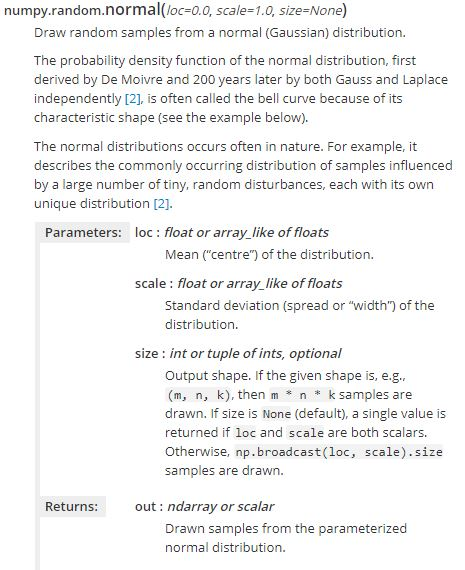

2. Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних. Детальний опис роботи критерію та приклад його розрахунку (с. 606): https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf

In [5]:
# Sort variables by ascending
df = df.apply(lambda x: x.sort_values().values)
df

,var1_normal,var2_normal,var3_normal,var4_laplace,var5_laplace,var6_laplace
0,6.677120,-5.329432,9.438733,2.972391,-7.524338,6.870345
1,7.919706,-3.492819,10.032450,5.554522,-6.709289,13.471540
2,8.037916,-2.586646,11.105642,5.933124,-3.413335,13.701377
3,8.441780,-2.532732,12.208818,5.992650,-3.166783,15.480670
4,8.803217,-0.362388,12.671430,6.181182,-2.648314,16.407658
5,8.942477,0.374244,13.965784,6.320735,-2.634629,18.737506
6,9.232678,0.641626,15.858799,6.526493,-1.286826,19.430676
7,9.381397,0.724714,15.917457,8.179417,-0.993200,20.084201
8,9.959620,0.754931,19.049304,8.445371,-0.755316,20.739454
9,10.028652,0.849313,19.681793,9.189906,-0.603348,21.751126


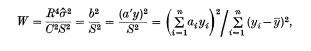

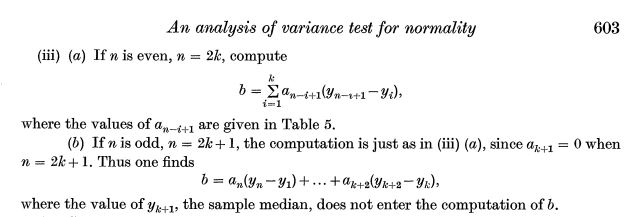

In [6]:
# b
arrSize = df.shape[0]
# coefficients for the W test for normality, n = 20
a=[0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]
def calcB(samples):
    return sum([a[i]*(samples[(arrSize-1)-i]-samples[i]) for i in range(arrSize//2)])

b= {key: calcB(df[key]) for key in df}

In [7]:
#  S^2
def calcSquaredS(samples, meanValue):
    return sum([ pow(samples[i]-meanValue, 2) for i in range(arrSize)]) 

meanValues = {key: np.mean(df[key]) for key in df}
squaredS = {key: calcSquaredS(df[key], meanValues[key])
                 for key in df}

In [8]:
#Calculate W by formula
def calcW(b, squaredS):
    return pow(b,2)/squaredS

WCalculated = {key: calcW(b[key], squaredS[key]) for key in df}

WTheoretical = sts.shapiro(df['var2_normal'])
WTheoretical

(0.9554431438446045, 0.45727914571762085)

Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution. Шаблон таблиці: https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing

In [9]:
titles = ["Variable", "Statistics", "Distribution"]
resultDf = pd.DataFrame(columns = titles)
resultDf

,Variable,Statistics,Distribution


1. Занести в стовпчик Variable назви змінних.

In [10]:
resultDf["Variable"] = df.keys()
resultDf

,Variable,Statistics,Distribution
0,var1_normal,NaN,NaN
1,var2_normal,NaN,NaN
2,var3_normal,NaN,NaN
3,var4_laplace,NaN,NaN
4,var5_laplace,NaN,NaN
5,var6_laplace,NaN,NaN


Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [11]:
resultDf["Distribution"] = [('normal ' if 'normal' in key else 'non-normal ')+
str(WCalculated[key]) for key in resultDf["Variable"]]
resultDf

,Variable,Statistics,Distribution
0,var1_normal,NaN,normal 0.9781782338708837
1,var2_normal,NaN,normal 0.9556427264075975
2,var3_normal,NaN,normal 0.9282333390832602
3,var4_laplace,NaN,non-normal 0.9430263530693023
4,var5_laplace,NaN,non-normal 0.9451284872680824
5,var6_laplace,NaN,non-normal 0.8347933116339213


Для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].

In [12]:
dfSize = resultDf.shape[0]

for i in range (dfSize):
    key = resultDf["Variable"][i]
    if 'normal' in key:
        resultDf["Statistics"][i] = f'{df[key].mean()} [{df[key].std()}]'

resultDf

,Variable,Statistics,Distribution
0,var1_normal,10.022404621845526 [1.6171433705883993],normal 0.9781782338708837
1,var2_normal,1.2530029359434518 [3.3541424803197737],normal 0.9556427264075975
2,var3_normal,19.281449538397943 [7.087744708515807],normal 0.9282333390832602
3,var4_laplace,NaN,non-normal 0.9430263530693023
4,var5_laplace,NaN,non-normal 0.9451284872680824
5,var6_laplace,NaN,non-normal 0.8347933116339213


Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [13]:
for i in range (dfSize):
    key = resultDf["Variable"][i]
    if 'normal' not in key:
        resultDf["Statistics"][i] = f'{df[key].median()} [{df[key].quantile(0.25)}; {df[key].quantile(0.75)}]'

resultDf

,Variable,Statistics,Distribution
0,var1_normal,10.022404621845526 [1.6171433705883993],normal 0.9781782338708837
1,var2_normal,1.2530029359434518 [3.3541424803197737],normal 0.9556427264075975
2,var3_normal,19.281449538397943 [7.087744708515807],normal 0.9282333390832602
3,var4_laplace,9.651199126940634 [6.28584691107917; 10.919786...,non-normal 0.9430263530693023
4,var5_laplace,-0.5003919771787501 [-2.6380502487022195; 1.01...,non-normal 0.9451284872680824
5,var6_laplace,21.825384131214207 [18.15504435291025; 26.6071...,non-normal 0.8347933116339213


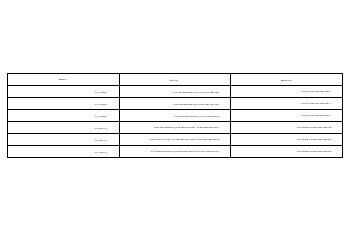

In [29]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
fig = plt.figure()
ax=fig.add_subplot(111)
cell_text = []
for row in range(len(resultDf)):
    cell_text.append(resultDf.iloc[row])

ax.table(cellText=cell_text, colLabels=resultDf.columns, loc='center')
ax.axis('off')
pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
pdf.savefig(fig)
pdf.close()